<a href="https://colab.research.google.com/github/mandoo2/pytorch/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import numpy
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt


In [ ]:
n_dim = 2
x_train, y_train = make_blobs(n_samples=80, n_features=n_dim, centers=[[1,1],[-1,-1],[1,-1],[-1,1]],shuffle=True, cluster_std=0.3)
x_test, y_test = make_blobs(n_samples=20, n_features=n_dim, centers=[[1,1],[-1,-1],[1,-1],[-1,1]], shuffle=True, cluster_std=0.3)

In [ ]:
def label_map(y_,from_,to_):
  y = numpy.copy(y_)
  for f in from_:
    y[y_ == f] = to_
  return y

y_train = label_map(y_train, [0,1], 0)
y_train = label_map(y_train, [2,3], 1)
y_test = label_map(y_test, [0,1], 0)
y_test = label_map(y_test, [2,3], 1)

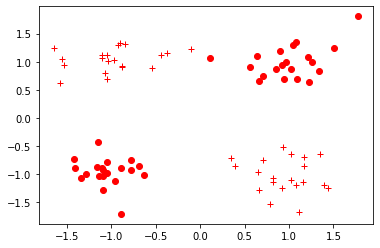

In [ ]:
def vis_data(x,y = None, c='r'):
  if y is None:
    y = [None] * len(x)
  for x_, y_ in zip(x,y):
    if y_ is None:
      plt.plot(x_[0],x_[1],'*',markerfacecolor='none',markeredgecolor=c)
    else:
      plt.plot(x_[0],x_[1],c+'o' if y_ == 0 else c+'+')
  
plt.figure()
vis_data(x_train, y_train, c='r')
plt.show()

In [ ]:
x_train = torch.FloatTensor(x_train)
print(x_train.shape)
x_test = torch.FloatTensor(x_test)
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)

torch.Size([80, 2])


In [ ]:
class NeuralNet(torch.nn.Module):
  def __init__(self, input_size, hidden_size):
    super(NeuralNet, self).__init__()
    self.input_size = input_size
    self.hidden_size = hidden_size
    self.linear_1 = torch.nn.Linear(self.input_size, self.hidden_size)
    self.relu = torch.nn.ReLU()
    self.linear_2 = torch.nn.Linear(self.hidden_size,1)
    self.sigmoid = torch.nn.Sigmoid()

  def forward(self, input_tensor):
    linear1 = self.linear_1(input_tensor)
    relu = self.relu(linear1)
    linear2 = self.linear_2(relu)
    output = self.sigmoid(linear2)
    return output

In [ ]:
model = NeuralNet(2, 5)
learning_rate = 0.03
criterion = torch.nn.BCELoss()
epochs = 2000
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
model.eval()
test_loss_before = criterion(model(x_test).squeeze(),y_test)
print('Before Traning, test loss is {}'.format(test_loss_before.item()))

Before Traning, test loss is 0.7035015225410461


In [ ]:
for epoch in range(epochs):
  model.train()
  optimizer.zero_grad()
  train_output = model(x_train)
  train_loss = criterion(train_output.squeeze(), y_train)
  if epoch % 100 == 0:
    print('Train loss as {} is {}'.format(epoch, train_loss.item()))
  train_loss.backward()
  optimizer.step()

Train loss as 0 is 0.7032691240310669
Train loss as 100 is 0.6586687564849854
Train loss as 200 is 0.5977128744125366
Train loss as 300 is 0.505755603313446
Train loss as 400 is 0.39860424399375916
Train loss as 500 is 0.292529433965683
Train loss as 600 is 0.20894770324230194
Train loss as 700 is 0.15409237146377563
Train loss as 800 is 0.1178661435842514
Train loss as 900 is 0.09414146840572357
Train loss as 1000 is 0.07662462443113327
Train loss as 1100 is 0.06371147930622101
Train loss as 1200 is 0.054126422852277756
Train loss as 1300 is 0.04758983850479126
Train loss as 1400 is 0.042503658682107925
Train loss as 1500 is 0.0384528823196888
Train loss as 1600 is 0.03516407310962677
Train loss as 1700 is 0.03244931250810623
Train loss as 1800 is 0.030175697058439255
Train loss as 1900 is 0.028247231617569923


In [ ]:
model.eval()
test_loss = criterion(torch.squeeze(model(x_test)), y_test)
print('After Training, test loss is {}'.format(test_loss.item()))

After Training, test loss is 0.02831139601767063


In [ ]:
torch.save(model.state_dict(),'./model.pt')
print('state_dict format of the model: {}'.format(model.state_dict()))

state_dict format of the model: OrderedDict([('linear_1.weight', tensor([[-1.6307, -1.2457],
        [ 1.6580,  1.6420],
        [ 0.3973,  0.1193],
        [-1.4411,  1.6246],
        [ 1.3974, -1.0520]])), ('linear_1.bias', tensor([-0.0641, -0.1853, -0.6515, -0.1108,  0.6036])), ('linear_2.weight', tensor([[-1.9001, -2.1933,  0.1807,  2.1207,  1.6301]])), ('linear_2.bias', tensor([0.0526]))])


In [ ]:
new_model = NeuralNet(2,5)
new_model.load_state_dict(torch.load('./model.pt'))
new_model.eval()
print('벡터 [-1,1]이 레이블 1을 가질 확률은 {}'.format(new_model(torch.FloatTensor([-1,1])).item()))

벡터 [-1,1]이 레이블 1을 가질 확률은 0.9966951608657837
